In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
kmeans = pd.read_parquet('./data/segments/kmeans.parquet')
rfm = pd.read_parquet('./data/segments/rfm.parquet')

In [56]:
mart = pd.read_parquet('./data/mart/data_mart.parquet')

In [57]:
ids = kmeans.index.intersection(mart.index)

In [58]:
mart = pd.merge(mart.loc[ids], kmeans, on='phone')

In [59]:
categories = ['related products', 'office goods', 'breastfeeding products',
             'textile, knitwear', 'footwear', 'toys', 'women things',
             'goods for pets', 'cosmetics and hygiene', 'diapers']

In [68]:
cat_stats = mart.groupby('k_means')[categories].mean()

In [69]:
cat_stats = (cat_stats.T / cat_stats.sum(axis=1)).T

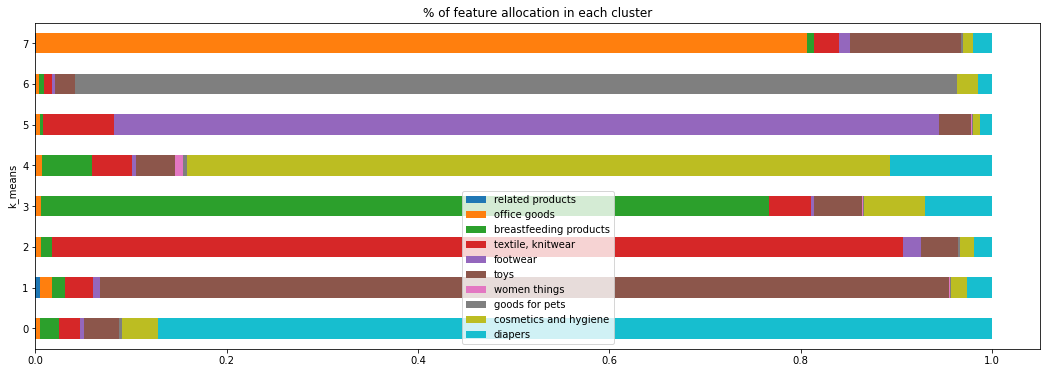

In [100]:
cat_stats.plot.barh(figsize=(18, 6), stacked=True); plt.title('% of feature allocation in each cluster');

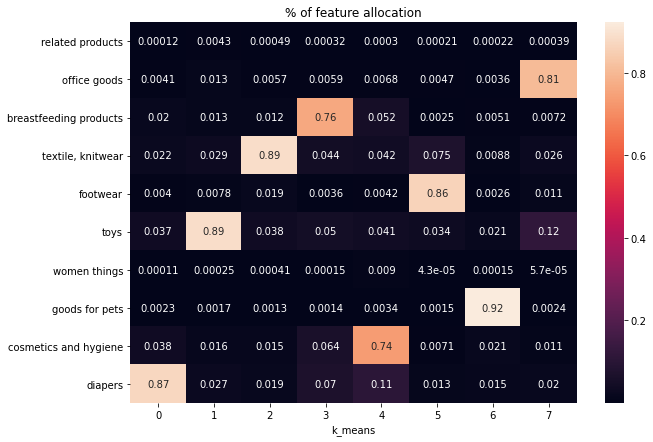

In [131]:
plt.figure(figsize=(10,7)); plt.title('% of feature allocation')
sns.heatmap(cat_stats.T, annot=True);

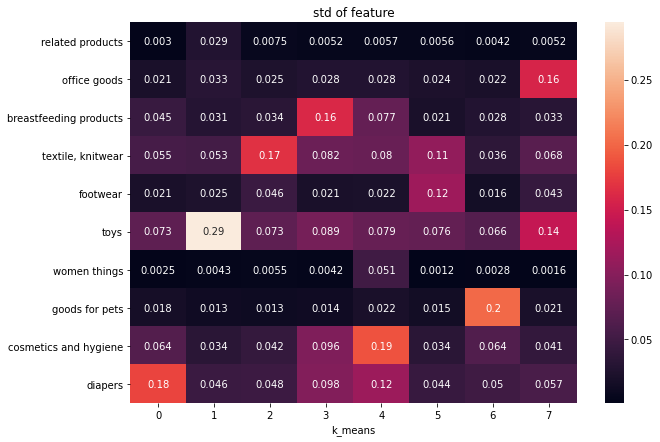

In [133]:
plt.figure(figsize=(10,7)); plt.title('std of feature')
sns.heatmap(mart.groupby(('k_means'))[categories].std().T, annot=True);

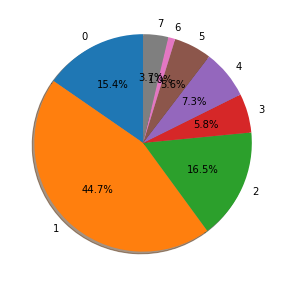

In [97]:
cluster_sizes = mart.groupby('k_means').count().values[:, 1]

plt.figure(figsize=(16,5))
plt.pie(cluster_sizes, labels=np.arange(len(cluster_sizes)), autopct='%1.1f%%', shadow=True, startangle=90);

In [102]:
mart.columns

Index(['successful_orders_count', 'avg_unique_items_per_order',
       'all_unique_items_purchased', 'avg_items_per_order',
       'all_items_purchased', 'avg_item_price', 'avg_unique_items_price',
       'all_items_price', 'avg_summed_cost_of_items_per_order',
       'total_shipping_charges', 'avg_shipping_charges',
       'total_service_charges', 'avg_service_charges', 'total_payment',
       'avg_payment', 'total_profit', 'avg_order_profit', 'avg_item_profit',
       'related products', 'baby food', 'office goods', 'books, disks',
       'breastfeeding products', 'textile, knitwear', 'footwear',
       'oversized goods', 'toys', 'women things', 'goods for pets',
       'cosmetics and hygiene', 'diapers', 'none', 'Oversized', 'Compact',
       'Unknown', 'number_canceled', 'avg_number_canceled', 'total_delivered',
       'avg_delivered', 'k_means'],
      dtype='object')

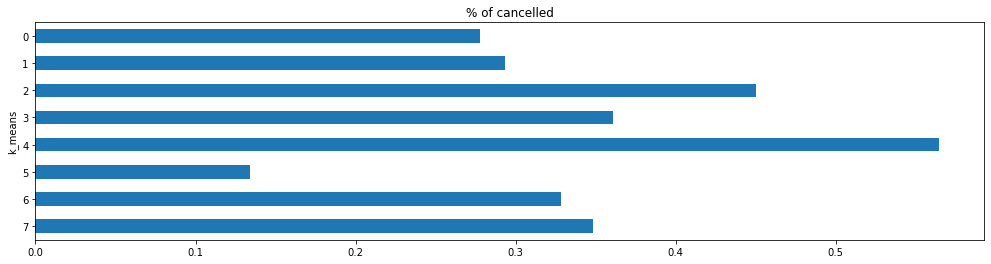

In [150]:
plt.figure(figsize=(17,4)); plt.title('% of cancelled')
tmp = mart.groupby('k_means')['number_canceled'].mean().sort_index(ascending=False)
tmp.plot.barh();

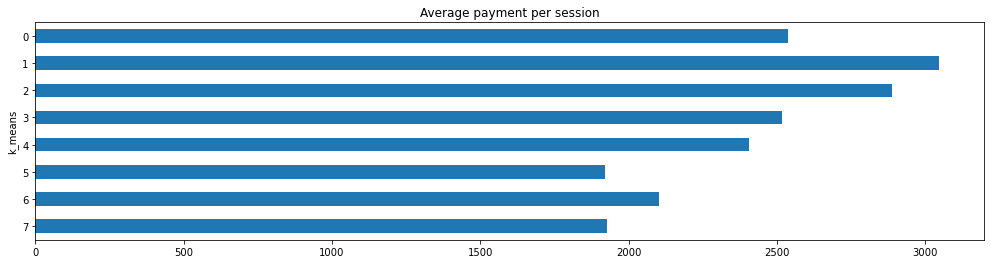

In [151]:
plt.figure(figsize=(17,4)); plt.title('Average payment per session')
tmp = mart.groupby('k_means')['avg_payment'].mean().sort_index(ascending=False)
tmp.plot.barh();

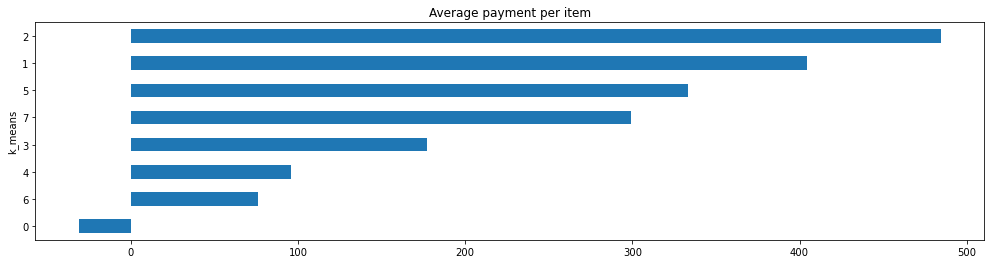

In [202]:
plt.figure(figsize=(17,4)); plt.title('Average payment per item')
tmp = mart.groupby('k_means')['avg_item_profit'].mean().sort_values()
tmp.plot.barh();

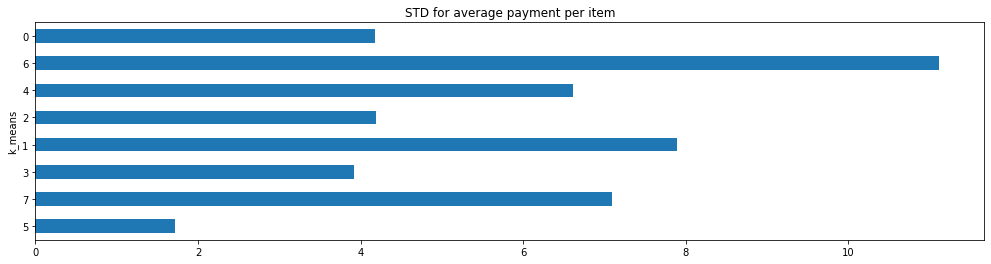

In [200]:
plt.figure(figsize=(17,4)); plt.title('STD for average payment item')
mart.groupby('k_means')['avg_item_profit'].std().loc[tmp.index].plot.barh();

In [174]:
rfm_clustered = pd.merge(mart['k_means'], rfm['RFM_Score'], on='phone').groupby(['k_means', 'RFM_Score']).size().unstack()
rfm_clustered

RFM_Score,3,4,5,6,7,8,9,10,11
k_means,,,,,,,,,
0,1158,1618,2062,2334,1272,792,442,319,269
1,1672,4333,5127,7216,5216,3421,1904,476,460
2,278,971,1713,2041,1965,1826,1600,312,307
3,312,641,839,876,561,356,187,65,37
4,345,734,981,1049,706,511,286,139,110
5,371,633,593,756,710,382,243,38,21
6,71,117,139,155,97,59,31,11,20
7,60,290,521,693,500,255,112,32,21


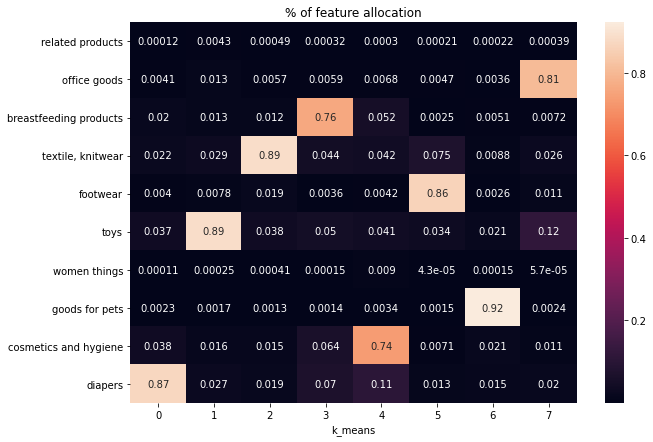

In [214]:
plt.figure(figsize=(10,7)); plt.title('% of feature allocation')
sns.heatmap(cat_stats.T, annot=True);

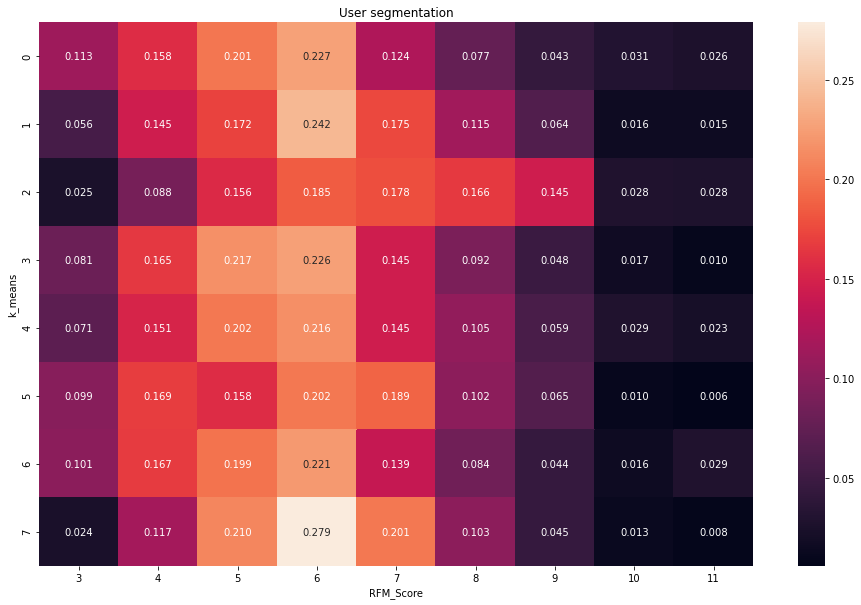

In [211]:
plt.figure(figsize=(16,10)); plt.title('User segmentation');
sns.heatmap((rfm_clustered.T / rfm_clustered.sum(axis=1)).T, annot=True, fmt='.3f');

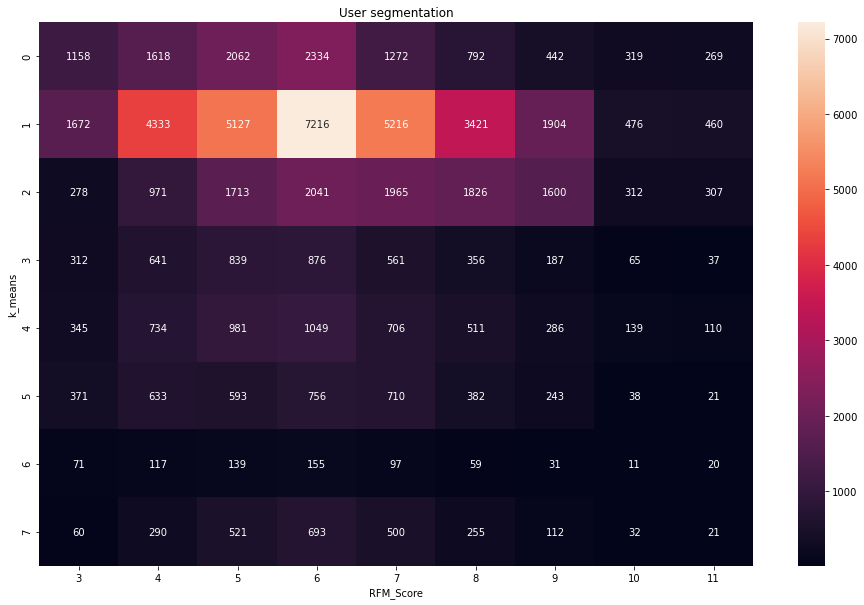

In [213]:
plt.figure(figsize=(16,10)); plt.title('User segmentation');
sns.heatmap(rfm_clustered, annot=True, fmt='g');